<br><br>

## Exercício clusterização: clusters RFM

<br>

No exercício a seguir, estudaremos um conceito muito interessante e comum no contexto de dados, os __clusters RFM!__

A sigla __RFM__ vem do inglês, significando __recency, frequency and monetary.__ Em português, recência, frequência e valor monetário.

Essa clusterização é muito comum quando o __objetivo é segmentar clientes de uma certa base__ em termos de:

<br>

__Recência__ de compra: há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia__ de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário__ das compras: qual foi o total gasto, nesta mesma janela de tempo.


<br>

Use a função getData para carregar os dados disponíveis para este exercício.

Esse dataset contém 4 colunas, em que cada linha/istância corresponde a um cliente único de uma certa empresa.

As colunas "rec", "freq" e "valor" indicam a recência, frequência e valor monetário do cliente num período de 120 dias.

Desta forma, por exemplo, um usuário com:

    - recência: 30
    
    - frequência: 5
    
    - valor: 10
    
deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

<br>

__Exercício:__

Como cientista de dados da empresa, o seu __objetivo__ é __analisar os dados disponíveis__ e procurar pelos __grupos de clientes mais valiosos e menos valiosos__ para a companhia. 

Justifique bastante suas análises e __interprete os resultados.__

Você pode (e deve!) utilizar técnicas de clusterização, como __KMeans__ e __DBSCAN__, bem como criar segmentações a partir de suas __análises exploratórias.__

Lembre-se que, neste contexto não supervisionado, não existe resposta certa e a __criatividade__ é fundamental!

__Obs.:__ Ao utilizar o KMeans e o DBSCAN, lembre-se de normalizar os dados antes de aplicar os algoritmos.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cluster
from sklearn.cluster import KMeans

def getData():
    return pd.read_csv("dataframe_exercicio_clusterizacao_RFM.csv")

In [2]:
df = getData()
df.head()

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067


Inicialmente, iremos realizar o tratamento das variáveis. Criaremos notas para 'rec' e 'freq'. Começando por 'rec', sabemos que o período de análise é de 120 dias e, nesse caso, quanto maior o valor atribuído a 'rec', menos interessante é, uma vez que representa o tempo desde a última compra do cliente. Dessa forma, criaremos uma nota de considerando as seguntes faixas para rec:

- 120 até 97: 1
- 96 até 73: 2
- 72 até 49: 3
- 48 até 25: 2
- 24 até 0: 1

In [3]:
rec_faixas = np.linspace(120, 0, 6)
rec_faixas

array([120.,  96.,  72.,  48.,  24.,   0.])

Faremos o mesmo para 'freq', levando em consideração os limites abaixo. Nesse caso, quanto maior a frequência, melhor.

- 0 até 4: 1
- 5 até 8: 2
- 9 até 12: 3
- 13 até 15: 4
- 16 até 20: 5

In [4]:
print('Valor mínimo - freq: %s' %(str(np.min(df.freq.values))))
print('Valor máximo - freq: %s' %(str(np.max(df.freq.values))))

# Criando as faixas
freq_faixas = np.linspace(0, 20, 6)
freq_faixas

Valor mínimo - freq: 1.0
Valor máximo - freq: 17.0


array([ 0.,  4.,  8., 12., 16., 20.])

Por último, criaremos a variável "valor_total" que será calculada pela multiplicação dos valores da coluna "freq" pela coluna "total". e, novamente, daremos notas. Assim como no caso da frequência, quanto maior o valor, melhor.

In [5]:
valor_total = df['freq'][:] * df['valor'][:]
print('Valor mínimo - valor_total: %s' %(str(np.min(valor_total))))
print('Valor máximo - valor_total: %s' %(str(np.max(valor_total))))

valor_faixas = np.linspace(0, 4030, 6)
valor_faixas

Valor mínimo - valor_total: 11.035878930188453
Valor máximo - valor_total: 4029.42311508214


array([   0.,  806., 1612., 2418., 3224., 4030.])

Conhecendo os valores máximo e mínimo de valor total, atribuiremos notas às faixas, assim como fizemos para os outros parâmetros.

- 0 até 806: 1
- 807 até 1612: 2
- 1612 até 2418: 3
- 2419 até 3224: 4
- 3225 até 4030: 5

#### Função para criar listas com o valor das notas levando em consideração as faixas criadas.

In [6]:
# Criando função para atribuir notas de acordo com as faixas especificadas
def atribuirNota(df_coluna_values, intervalo, decrescente = False):
    
    # Lista para armazenar as notas
    lista_notas = []
    if (decrescente):
        for item in df_coluna_values:
            if (item < intervalo[0] and item >= intervalo[1]):
                lista_notas.append(1)
            elif (item < intervalo[1] and item >= intervalo[2]):
                lista_notas.append(2)
            elif (item < intervalo[2] and item >= intervalo[3]):
                lista_notas.append(3)
            elif (item < intervalo[3] and item >= intervalo[4]):
                lista_notas.append(4)
            else:
                lista_notas.append(5)
    else:
        for item in df_coluna_values:
            if (item >= intervalo[0] and item <= intervalo[1]):
                lista_notas.append(1)
            elif (item > intervalo[1] and item <= intervalo[2]):
                lista_notas.append(2)
            elif (item > intervalo[2] and item <= intervalo[3]):
                lista_notas.append(3)
            elif (item > intervalo[3] and item <= intervalo[4]):
                lista_notas.append(4)
            else:
                lista_notas.append(5)
    
    return lista_notas

In [7]:
# Atribuindo notas de acordo com as faixas especificadas
lista_rec = atribuirNota(df_coluna_values = df.rec.values, intervalo = rec_faixas, decrescente = True)
lista_freq = atribuirNota(df_coluna_values = df.freq.values, intervalo = freq_faixas)
lista_valor_total = atribuirNota(df_coluna_values = valor_total, intervalo = valor_faixas)

In [8]:
# Criando um novo dataframe a ser avaliado
df_novo = pd.DataFrame(np.c_[df.user, lista_rec, lista_freq, lista_valor_total],
                      columns = ['user', 'rec', 'freq', 'valor'])
df_novo.head()

,user,rec,freq,valor
0,1,5,2,2
1,2,3,2,2
2,3,2,2,2
3,4,4,1,1
4,5,5,2,2


Agora, criaremos um gráfico de dispersão entre as features 'rec' e 'freq', aplicando o 'valor' como cor para verificar se é possível identificar alguns grupos.

Por último, iremos checar como Recency e Frequency se relacionam com Monetary.

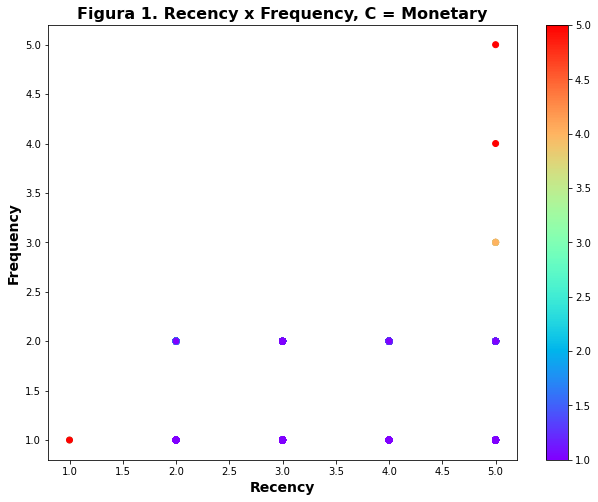

In [9]:
plt.figure(figsize=[10.5,8])
plt.scatter(df_novo['rec'][:], df_novo['freq'][:], c = df_novo['valor'][:], cmap=plt.cm.rainbow)
plt.colorbar()
plt.title('Figura 1. Recency x Frequency, C = Monetary', fontsize = 16, fontweight = 'bold')
plt.xlabel('Recency', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.show()

A Figura 1 mostra Estamos interessados em fragmentar essa base em clientes valiosos e clientes sem valor para as empresas. Sendo assim, usaremos, inicialmente, o algoritmo K-means com dois clusters. Antes, separaremos as variáveis usando a função separarVar.

In [10]:
# Função para separar as variáveis independentes da variável dependente.
def separarVar(df_): # DataFrame de entrada
    
    verificador = True
    
    # Loop para separar as variáveis independentes da variável dependente
    for item in df_.columns:
        if verificador:
            if (item != 'user'):
                X = df_[item].values.reshape(-1,1)
                verificador = False
        else:
            if (item != 'user'):
                X = np.c_[X, df_[item].values.reshape(-1,1)]
    
    return X#  Dados de saída

X_data = separarVar(df_novo)

In [11]:
# Instanciando o modelo
km = KMeans(n_clusters = 2) 

# Treinando o modelo
km.fit(X_data)

# Obtendo a classificação dos usuários
grupos = km.predict(X_data)

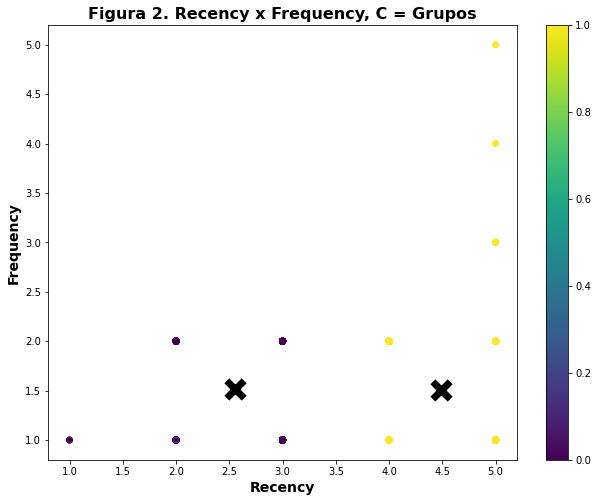

In [12]:
plt.figure(figsize=[10.5,8])
plt.scatter(df_novo['rec'][:], df_novo['freq'][:], c = grupos, cmap = plt.cm.viridis)
plt.colorbar()

for center in km.cluster_centers_:
    plt.scatter(center[0], center[1], s = 300, marker = 'x', c = 'black', lw = 7)
    
plt.title('Figura 2. Recency x Frequency, C = Grupos', fontsize = 16, fontweight = 'bold')
plt.xlabel('Recency', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.show()

O X na Figura 2 indica o centro do cluster que foi considerado para separar os clientes valiosos (pontos amarelo ou classe 1), dos clientes menos valiosos (pontos azuis ou classe 0). Traduzindo isso em porcentagem, temos o gráfico de barras mostrado na Figura 3.

__Nota:__ Cada vez que kernel é rodado, a ordem de classificação acima se altera. Então, para essa classificação foi considerado o seguinte:

    - Clientes valiosos: Aqueles que estão no grupo dos pontos que se encontram no canto superior direito da figura 2.
    - Clientes menos valiosos: Aqueles que estão no grupo dos pontos que se encontram no canto inferior esquerdo da figura 2.

In [14]:
df_grupos = pd.DataFrame(np.c_[df_novo.user, grupos], columns = ['user', 'Grupo'])
total_clientes = df_grupos.user.value_counts().sum()
df_2_grupos = df_grupos.groupby(['Grupo']).apply(lambda x: x.user.value_counts().sum())
#print(df_2_grupos)

df_2_grupos = pd.DataFrame(np.c_[df_2_grupos[0] * 100 /total_clientes, df_2_grupos[1] * 100 /total_clientes],
                           columns = ['Menos valiosos', 'Mais valiosos'])


#df_2_grupos

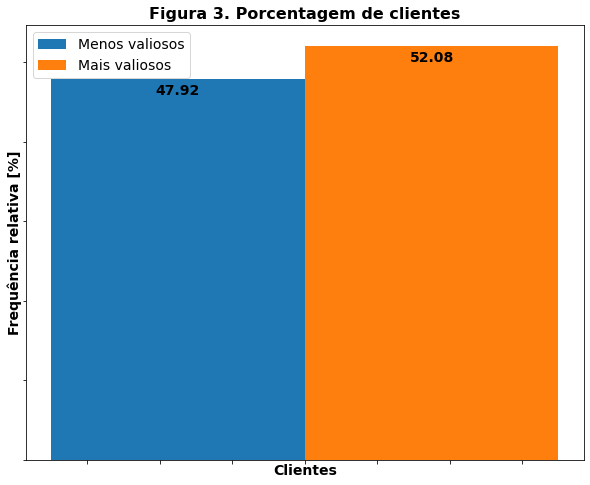

In [15]:
labels = df_2_grupos.columns

x = 1
width = 0.35

#construção do frame, criando figura e eixos
fig, ax = plt.subplots(figsize=[10,8])

#valores para construção do gráfico de barras
rect1 = ax.bar(x - width/2, df_2_grupos[labels[0]].values, width, label='Menos valiosos')
rect2 = ax.bar(x + width/2, df_2_grupos[labels[1]].values, width, label='Mais valiosos')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência relativa [%]', fontsize = 14, fontweight = 'bold') # legenda eixo y
ax.set_xlabel('Clientes', fontsize = 14, fontweight = 'bold') # Legenda eixo x
ax.set_title('Figura 3. Porcentagem de clientes', fontsize = 16, fontweight = 'bold') # Título
ax.tick_params(axis='x',label1On=False) # Removendo labels dos ticks do eixo x
ax.tick_params(axis='y',label1On=False) # Removendo labels dos ticks do eixo y

plt.text(x = x - width/2, y = df_2_grupos[labels[0]].values - 2,
         s = str(round(df_2_grupos[labels[0]].values[0],2)),
         fontsize = 14, fontweight = 'bold', ha='center')
plt.text(x = x + width/2, y = df_2_grupos[labels[1]].values - 2,
         s = str(round(df_2_grupos[labels[1]].values[0],2)),
         fontsize = 14, fontweight = 'bold', ha='center')

ax.legend(prop={"size":14}) # legenda do gráfico
plt.show()

Com a abordagem adotada, vê-se que 52,08% dos clientes são classificados como "mais valiosos", enquanto o restante é classificado como "menos valiosos".

Entretanto, essa abordagem pode ser melhorada. Caso mais um cluster seja introduzido, pode-se identificar um terceiro grupo de clientes. Para esse novo grupo de clientes, poderíamos direcionar uma série de ações para garantir que os mesmos se tornassem clientes "menos valiosos" e, posteriormente, "mais valiosos". Vejamos abaixa a aplicação dessa abordagem.

In [24]:
# Instanciando o modelo
km_3 = KMeans(n_clusters = 3) 

# Treinando o modelo
km_3.fit(X_data)

# Obtendo a classificação dos usuários
grupos_3 = km_3.predict(X_data)

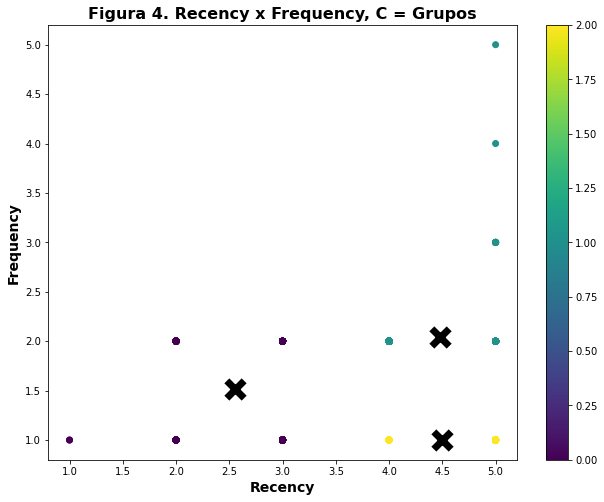

In [26]:
# Plotando o gráfico para analisar a nova segmentação
plt.figure(figsize=[10.5,8])
plt.scatter(df_novo['rec'][:], df_novo['freq'][:], c = grupos_3, cmap = plt.cm.viridis)
plt.colorbar()

for center in km_3.cluster_centers_:
    plt.scatter(center[0], center[1], s = 300, marker = 'x', c = 'black', lw = 7)
    
plt.title('Figura 4. Recency x Frequency, C = Grupos', fontsize = 16, fontweight = 'bold')
plt.xlabel('Recency', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.show()

Agora obtemos três grupos de classificação:
    
- Grupo 2: Clientes menos valiosos (em amarelo)
- Grupo 1: Clientes mais valiosos (em verde)
- Grupo 0: Clientes precisando de atenção (em azul)

Vejamos a distribuição relativa adotando essa nova abordagem.

__Nota:__ Cada vez que kernel é rodado, a ordem acima se altera. Então, para essa classificação foi considerado o seguinte:

    - Clientes valiosos: Aqueles que estão no grupo dos pontos que se encontram no canto superior direito da figura 4.
    - Clientes menos valiosos: Aqueles que estão no grupo dos pontos que se encontram no canto inferior direito da figura 4.
    - Clientes precisando de atenção: Aqueles que estão no grupo dos pontos que se encontram no canto interior esquerdo da figura 4.

In [28]:
df_grupos_3 = pd.DataFrame(np.c_[df_novo.user, grupos_3], columns = ['user', 'Grupo'])
total_clientes = df_grupos_3.user.value_counts().sum()
df_3_grupos = df_grupos_3.groupby(['Grupo']).apply(lambda x: x.user.value_counts().sum())
print(df_3_grupos)
df_3_grupos = pd.DataFrame(np.c_[df_3_grupos[0] * 100 /total_clientes, df_3_grupos[1] * 100 /total_clientes, df_3_grupos[2] * 100 /total_clientes],
                           columns = ['Atenção', 'Mais valiosos', 'Menos valiosos'])

df_3_grupos


Grupo
0    485
1    257
2    270
dtype: int64


,Atenção,Mais valiosos,Menos valiosos
0,47.924901,25.395257,26.679842


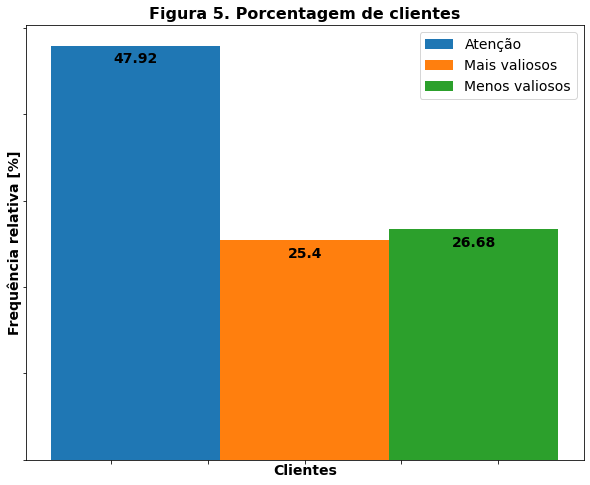

In [33]:
labels = df_3_grupos.columns

x = 1
width = 0.35

#construção do frame, criando figura e eixos
fig, ax = plt.subplots(figsize=[10,8])

#valores para construção do gráfico de barras
rect1 = ax.bar(x - width, df_3_grupos[labels[0]].values, width, label='Atenção')
rect2 = ax.bar(x, df_3_grupos[labels[1]].values, width, label='Mais valiosos')
rect3 = ax.bar(x + width, df_3_grupos[labels[2]].values, width, label='Menos valiosos')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência relativa [%]', fontsize = 14, fontweight = 'bold') # legenda eixo y
ax.set_xlabel('Clientes', fontsize = 14, fontweight = 'bold') # Legenda eixo x
ax.set_title('Figura 5. Porcentagem de clientes', fontsize = 16, fontweight = 'bold') # Título
ax.tick_params(axis='x',label1On=False) # Removendo labels dos ticks do eixo x
ax.tick_params(axis='y',label1On=False) # Removendo labels dos ticks do eixo y

plt.text(x = x - width, y = df_3_grupos[labels[0]].values - 2,
         s = str(round(df_3_grupos[labels[0]].values[0],2)),
         fontsize = 14, fontweight = 'bold', ha='center')
plt.text(x = x, y = df_3_grupos[labels[1]].values - 2,
         s = str(round(df_3_grupos[labels[1]].values[0],2)),
         fontsize = 14, fontweight = 'bold', ha='center')
plt.text(x = x + width, y = df_3_grupos[labels[2]].values - 2,
         s = str(round(df_3_grupos[labels[2]].values[0],2)),
         fontsize = 14, fontweight = 'bold', ha='center')

ax.legend(prop={"size":14}) # legenda do gráfico
plt.show()

Nessa nova abordagem, vemos que existe uma grande porcentagem de clientes que apresentam baixa recência, frequência e/ou valor. Com isso conhecido, pode-se adotar alguma medida para chamar a atenção dos mesmos e torná-los clientes "mais valioso" com o passar do tempo.

Através da curva de Elbow podemos avaliar qual é o número ideal de clusters para o problema acima.

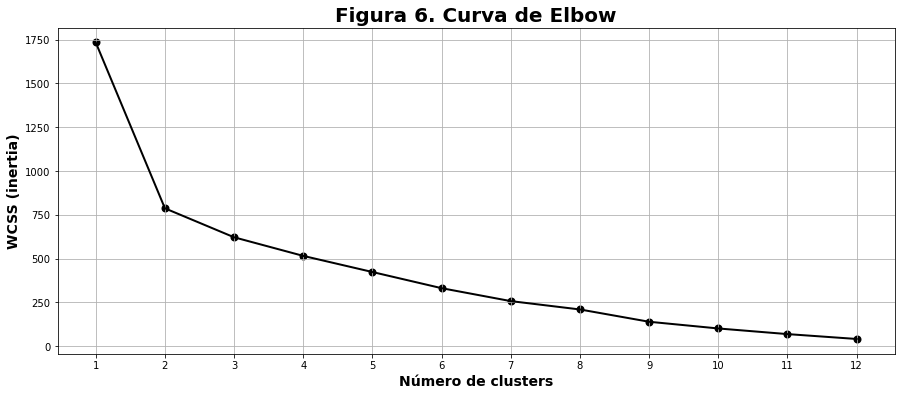

In [34]:
#calculando as inertias - WCSS para cada cluster
lista_inertias = []
for i in range(1, 13):
    km = KMeans(n_clusters=i)
    km.fit(X_data)
    lista_inertias.append(km.inertia_)
    
    
#plotando a curva de elbow    
plt.figure(figsize=[15,6])
plt.title("Figura 6. Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(lista_inertias)), lista_inertias, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(lista_inertias)), lista_inertias, c = 'black', lw = 2)
plt.xticks(range(1,1+len(lista_inertias)))
plt.grid()
plt.show()

Através da Figura 6, pode-se verificar que o número de clusters usado na primeira parte do problema (n_clusters = 2) pode ser definido como o ponto de Elbow. Entretanto, usando n_clusters = 3, conseguimos identificar um terceiro grupo no qual podemos focar esforços para torná-los clientes mais assíduos.

Mais informações sobre os algoritmos de clusterização: [clique aqui](https://scikit-learn.org/stable/modules/clustering.html)